Movie Recommendation Analysis

Overview

Microsoft intends to establish a lucrative film studio as part of its decision. The financial performance of various genres is shown through descriptive analysis of box office income, budget, ratings, and genres. Microsoft can use this data to determine the kinds of movies it wants to make.

Business Problem

Microsoft aims to establish a profitable film studio. To help them choose what kinds of movies to make, they would like to know what kinds of movies are currently doing the best in the film industry. I examined which genres had the biggest return on investment, which ones have the most reviews, and which ones do well in both domestic and international markets using data from IMDB and The Numbers. This will facilitate Microsoft's profitable entry into the film industry.

1.DATA UNDERSTANDING

IMDB

IMDB keeps track of movie titles, release dates, length, and genres. They have several databases that link movies based on their ID. Users can also rate movies on IMDB, which keeps track of the average rating and number of reviewers for each film.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df_imdb_title = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\tn.movie_budgets.csv\tn.movie_budgets.csv")
df_imdb_title.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
df_imdb_title = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\tmdb.movies.csv\tmdb.movies.csv")
df_imdb_title.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
df_imdb_title = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\bom.movie_gross.csv\bom.movie_gross.csv")
df_imdb_title.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


HIGHEST RATING GENRE
Which genre(s) is most likely to receive the highest ratings?

In [14]:
#load data for single item
df_imdb_title =(r"C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\tmdb.movies.csv\tmdb.movies.csv")
print(df_imdb_title)
df_imdb = pd.read_csv(df_imdb_title )
df_imdb.head()

C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\tmdb.movies.csv\tmdb.movies.csv


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


vote_count
1        6541
2        3044
3        1757
4        1347
5         969
         ... 
1407        1
1410        1
1420        1
1422        1
22186       1
Name: count, Length: 1693, dtype: int64

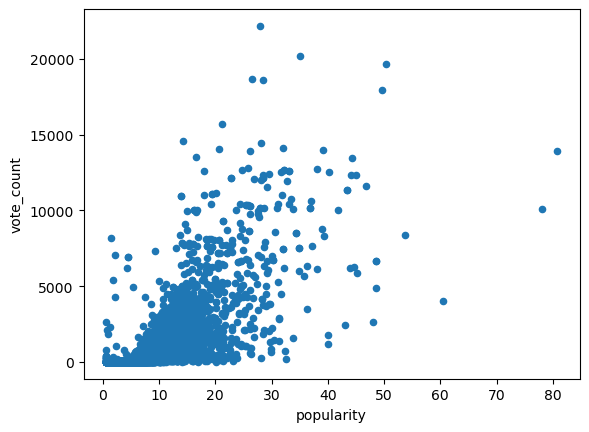

In [15]:
display(df_imdb.describe())
display(df_imdb.value_counts('vote_count'))
df_imdb.plot.scatter(x='popularity', y='vote_count');

As we move forward, we have two options for how we will interpret the vote data in this table: either treat each movie rating as equal to all others (with a minimum number of votes per movie) or treat each user vote as a rating vote for each of its genres. We'll look into the first approach. Unfortunately, there are a good number of movies in this database that have low vote counts. Since we work for Microsoft, our objective is to make films that a large number of people will enjoy; however, because we are a very large company, there probably needs to be a minimum for the amount of interest in our movie. As this scatterplot shows, there is a positive correlation between each user vote and the rating vote for each genre.

In [16]:
#cleaning out entries with no defined genre_ids
df_imdb = df_imdb[df_imdb['genre_ids'] != '[]']
print(df_imdb.shape[0])

#confirming our genre_ids table will no longer start with empty values
display(df_imdb.sort_values('genre_ids', ascending=False, inplace=False).head())

24038


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13467,13467,[99],261810,en,Silenced,0.600,2014-11-19,Silenced,7.7,7
15976,15976,[99],441888,en,America's Greatest Prison Breaks,0.883,2015-12-27,America's Greatest Prison Breaks,6.0,1
15977,15977,[99],566441,en,The Hunger Games: The Phenomenon,0.882,2015-11-12,The Hunger Games: The Phenomenon,10.0,1
15988,15988,[99],562517,en,Birdman: All-Access (A View From the Wings),0.881,2015-05-18,Birdman: All-Access (A View From the Wings),10.0,1
15989,15989,[99],390455,en,IOM TT,0.881,2015-06-27,IOM TT,10.0,1


NaNs have been removed from the genre_ids column.Let's now filter the results to only show films that have received five or more votes.

In [17]:
#filtering out entries with less than 5 votes
df_imdb_5vote_min = df_imdb[df_tmdb['vote_count'] >= 5]
print(df_imdb_5vote_min.shape[0])
df_imdb_5vote_min.head()

13653


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5416\856486495.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_imdb_5vote_min = df_imdb[df_tmdb['vote_count'] >= 5]


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In order to know all the data that will be shown for our genres visualization, we must now ascertain each unique genre_id.

In [18]:
#this is meant to interact with our 'genre_ids' strings from the dataframe
#and return these numbers as a list object
def genre_string_to_list(ids_string):
    strcopy = ids_string.replace('[','').replace(']','').replace(' ','')
    return strcopy.split(',')

In [19]:
#determine what the possible genre_ids are in our dataset
all_genre_ids = [] #empty list start
for index, row in df_imdb_5vote_min.iterrows(): #iterate over dataframe rows
    genre_string = row['genre_ids']
    genre_list = genre_string_to_list(genre_string) #generate a list for this row
    for genre in genre_list: #iterate over the row, adding to our cumulative list of all ids
        if genre not in all_genre_ids: #if it's not already in our list
            all_genre_ids.append(genre)
        
print(all_genre_ids)

['12', '14', '10751', '16', '28', '878', '35', '53', '27', '80', '18', '10749', '10402', '9648', '36', '37', '10770', '10752', '99']


We need to figure out how to convert the unique list of genre_ids into actual string values. For this, making a local dictionary seems like a reasonable solution. The movie database API provided these values.

In [20]:
#Lookup from the movie database API for the genre list
genre_ids_dict = {'12':'Adventure', '28':'Action', '16':'Animation', '35':'Comedy', '80':'Crime', '99':'Documentary',
                     '18':'Drama', '10751':'Family', '14':'Fantasy', '36':'History', '27':'Horror', '10402':'Music',
                     '9648':'Mystery', '10749':'Romance', '878':'SciFi', '10770':'TV Movie', '53':'Thriller',
                     '10752':'War', '37':'Western'}

Let's begin finding values and filtering now. We'll filter for each genre_id as we loop over all of the newly created unique genre_ids. The intermediate position for each genre can then be found by taking the mean vote_average of the remaining rows. To ensure that this value is appropriate for one of our genres and to provide additional useful information, we will also print the standard deviation.

In [22]:
#Find the vote averge per genre, place into a dictionary
genre_counts_dict = {}
for genre in all_genre_ids:
    temp_df = df_imdb_5vote_min[df_imdb_5vote_min['genre_ids'].str.contains(genre)] #dataframe filtered on each genre id
    vote_average = temp_df['vote_average'].mean()
    genre_string = genre_ids_dict.get(genre) #lookup genre name based on ID
    genre_counts_dict[genre_string] = vote_average #add average rating for this genre, place into dict
    print(genre_string+ ":" + str(vote_average) + "  stdev:"+str(temp_df['vote_average'].std()))

Adventure:5.935914811229429  stdev:1.226641267419859
Fantasy:5.987247474747474  stdev:1.2659406837545824
Family:6.094617563739376  stdev:1.045956893190795
Animation:6.499438832772166  stdev:1.0264314309735092
Action:5.627225939269172  stdev:1.227170463696232
SciFi:5.434268707482993  stdev:1.3807395400733902
Comedy:5.937260428410372  stdev:1.0861553038379435
Thriller:5.433604689026375  stdev:1.1057198041873628
Horror:4.840957202024851  stdev:1.164676309773179
Crime:5.960220994475138  stdev:0.9752898881168468
Drama:6.159110130538701  stdev:1.0240278171999917
Romance:6.078312537136066  stdev:0.9903693228905228
Music:6.7956896551724135  stdev:1.0483262184461102
Mystery:5.760859728506788  stdev:1.0953757152920507
History:6.673815461346633  stdev:0.9137492302926176
Western:5.592920353982301  stdev:1.313713168177411
TV Movie:5.834434561626431  stdev:0.9930527273578601
War:6.377685950413223  stdev:1.1754040607139613
Documentary:6.920766590389016  stdev:0.893657666909509


We have our data, and at first glance, it can be a little difficult to understand exactly what all these numbers mean. To help us, let's make a visualization.

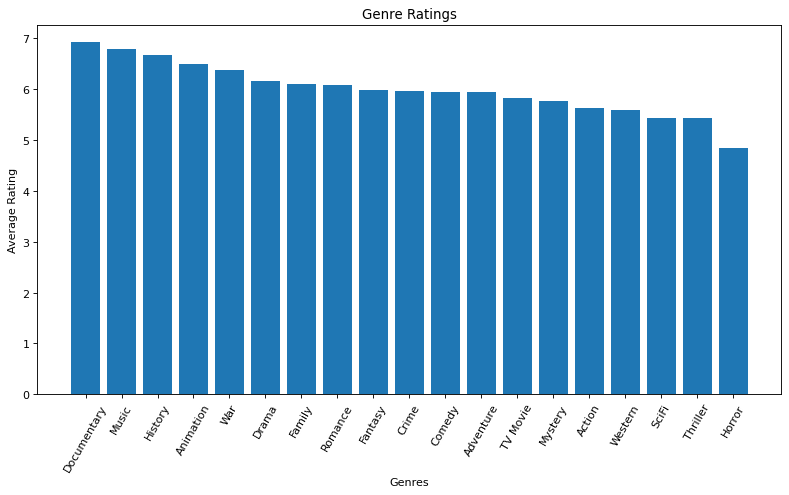

In [23]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

#sorting dict for visualization
genre_counts_dict = dict(sorted(genre_counts_dict.items(), key=lambda item: item[1], reverse=True))
keys = genre_counts_dict.keys()
values = genre_counts_dict.values()

y_pos = np.arange(len(keys))
plt.xticks(y_pos, keys, rotation=60)
plt.bar(keys,values)
plt.title("Genre Ratings")
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.show()

From this IMDB dataset, it is evident that Documentaries have the highest average ratings of any type of movie with five or more ratings. Furthermore, this genre's lowest standard deviation among all others confirms its status as the best genre in this instance (most consistent), which is a very positive indicator. It's also important to note that the data suggests that it might be best to stay away from horror films, as this genre clearly stands out as the lowest-rated by a considerable margin.

The Ideal Budget to Prevent Profit Losses

We're going to try our hand at answering the following: Which genre or genres have the highest chance of being profitable?

The exact information we require to calculate profits is contained in the "tn.movie_budgets.csv.gz". I think by figuring out the profits, we'll be able to get fresh information and provide an answer to another query:


WHAT IS THE OPTIMAL BUDGET RANGE TO PREVENT LOSSES ON PROFITS

In order to determine our Most Profitable Genre(s), we will need to try importing the genre from another table. Regretfully, profits AND genre are not included in the same table.

For now, let's start by taking a closer look at the "The Numbers" dataset.

In [25]:
#investigate and clean this data
tn_filename = (r"C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\tn.movie_budgets.csv\tn.movie_budgets.csv")
print(tn_filename)
df_tn = pd.read_csv(tn_filename)
df_tn.sort_values('production_budget', ascending=False).head()

C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\tn.movie_budgets.csv\tn.movie_budgets.csv


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
406,7,"Nov 6, 2015",The Peanuts Movie,"$99,000,000","$130,178,411","$250,091,610"
407,8,"Feb 8, 2019",The LEGO Movie 2: The Second Part,"$99,000,000","$105,806,508","$190,325,698"
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441"
5326,27,"Jun 1, 2007",And Then Came Love,"$989,000","$8,158","$8,158"
409,10,"May 4, 2001",The Mummy Returns,"$98,000,000","$202,007,640","$435,040,395"


We will need to convert production_budget, domestic_gross, and worldwide_gross to an actual number format, as I can see right away. Production_budget sorting reveals values out of order (see fourth entry, "And Then Came Love"), so this obviously needs to be fixed. Let's write a method that will help us translate these strings into numerical values.

In [26]:
def convert_money_to_value(money):
    money = money.replace('$', '')
    money = money.replace(',', '')
    money = int(money) #this could be an issue if we pass the integer value limit but I don't think we will
    return money

convert_money_to_value('$99,000,000')

99000000

In [27]:
#Only run once***
#apply lambda function on money columns
df_tn['prod_budget_int'] = df_tn.apply(lambda x: convert_money_to_value(x['production_budget']), axis=1)
df_tn['dom_gross_int'] = df_tn.apply(lambda x: convert_money_to_value(x['domestic_gross']), axis=1)
df_tn['ww_gross_int'] = df_tn.apply(lambda x: convert_money_to_value(x['worldwide_gross']), axis=1)
df_tn.drop(columns = ['production_budget', 'domestic_gross', 'worldwide_gross'], inplace=True)
df_tn.head()

,id,release_date,movie,prod_budget_int,dom_gross_int,ww_gross_int
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


For the time being, let's limit our analysis to the most likely profit value globally in order to keep things simple.

In [28]:
df_tn['ww_profit'] = df_tn['ww_gross_int'] - df_tn['prod_budget_int']
df_tn.head()

,id,release_date,movie,prod_budget_int,dom_gross_int,ww_gross_int,ww_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


We currently have all the information required to determine whether higher-budget films are more likely to experience financial losses. This would provide us with some crucial information regarding possible risks to a movie's budget. Let's see it in picture form.


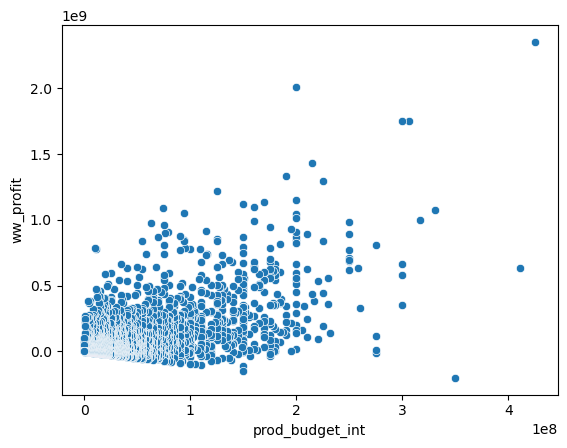

In [29]:
#Budget vs Profit
sns.scatterplot(data=df_tn, x="prod_budget_int", y="ww_profit");

There seems to be a general positive correlation here; otherwise, there would be no incentive to make bigger, better films. It makes sense to do this. Keep in mind that there are quite a few values below the profit line (x axis).

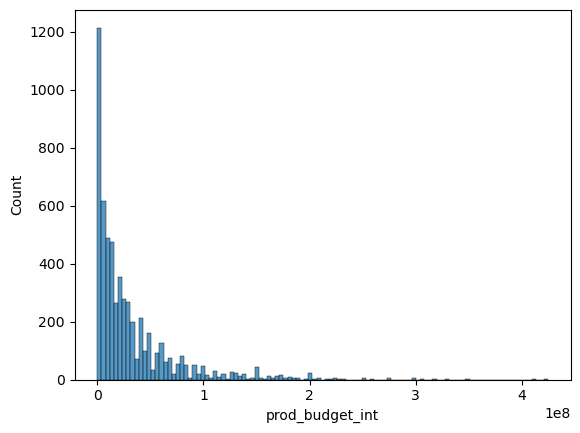

In [30]:
sns.histplot(data=df_tn, x="prod_budget_int");

In [31]:
#a method that finds our profit percentage- taking in a dataframe, lower limit value, and upper limit value.
def find_profit_percentage(dataframe, lower_limit=0, upper_limit=1e100): #set to zero and an extremely large number, should do the trick for this
    temp_df_total = dataframe[(dataframe['prod_budget_int'] <= upper_limit) & (dataframe['prod_budget_int'] >= lower_limit)] #impose conditionals for upper and lower
    temp_df_profit = temp_df_total[temp_df_total['ww_profit'] > 0] #profitable if positive number here
    x = temp_df_profit.shape[0]/temp_df_total.shape[0] #divide the number of rows in our filtered dataframe by number of rows with positive values in that dataframe
    return x*100 #put into percentage

In [32]:
bins= ['<5m', '5-10m', '10-20m', '20-50m', '50m-200m', '200m+']
percentages_with_profits = []
percentages_with_profits.append(find_profit_percentage(df_tn, upper_limit=5000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=5000000, upper_limit=10000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=10000000, upper_limit=20000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=20000000, upper_limit=50000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=50000000, upper_limit=200000000))
percentages_with_profits.append(find_profit_percentage(df_tn, lower_limit=20000000))

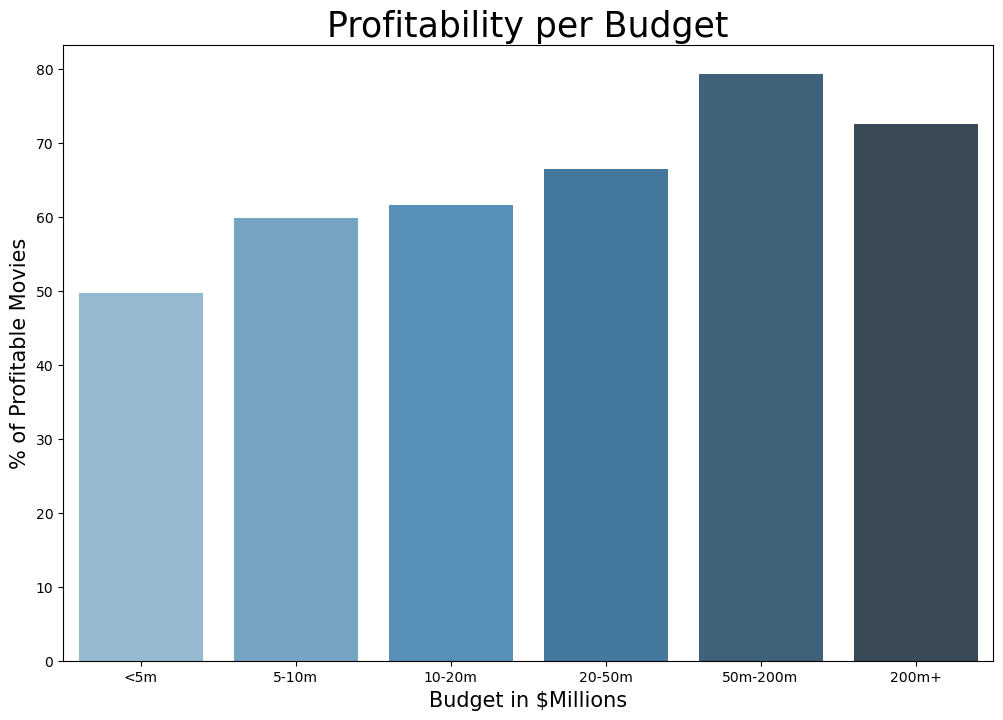

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x= bins, y=percentages_with_profits, palette="Blues_d")
ax.set_title("Profitability per Budget", fontsize= 25)
ax.set_xlabel("Budget in $Millions", fontsize=15)
ax.set_ylabel("% of Profitable Movies", fontsize=15);

This is very good. This seems to be trending upward, which makes sense. Higher budgeted films are more likely to be profitable overall—to a certain extent. There is a falloff, with the peak located between 50 and 200 meters. As a result of the wide range, let us examine this particular range in more detail to see if we can use the data to determine the ideal budget range of $10 million for our film.

A better approach will be required. Earlier, we had to call our previous method multiple times and enter a large number. Now, let's try to automate that process by allowing our method to run multiple times.

In [34]:
def find_profit_percentage_equal_limit_increase(dataframe, starting_lower_limit, increment_value, max_iterations):
    percentages_with_profits = []
    num_iterations = 0
    current_lower_limit = starting_lower_limit
    
    while num_iterations < max_iterations:
        num_iterations+=1 #loop structure for #iterations parameter
        upper_limit = current_lower_limit + increment_value #updating our upper_limit based on the increment_value param
        temp_df_total = dataframe[(dataframe['prod_budget_int'] <= upper_limit) & (dataframe['prod_budget_int'] >= current_lower_limit)]
        temp_df_profit = temp_df_total[temp_df_total['ww_profit'] > 0]
        
        denominator = temp_df_total.shape[0]
        if temp_df_total.shape[0] == 0: #avoiding division by zero
            denominator = 1
        pct = temp_df_profit.shape[0]/denominator #dividing # of profit entries by total # of entries
        percentages_with_profits.append(pct*100) #percentage value
        
        current_lower_limit = upper_limit #setting new lower limit for next loop, after calcs have already taken place
    
    return percentages_with_profits

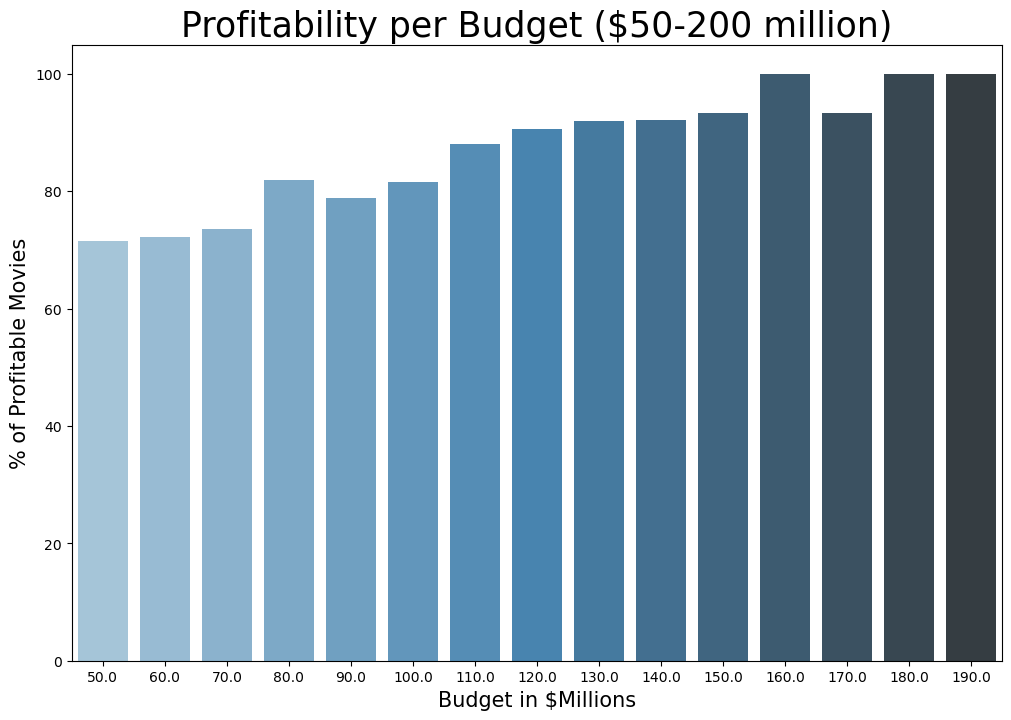

In [35]:
fifty_plus_bins= np.arange(50000000,200000000,10000000)
fifty_plus_bins_percentages = find_profit_percentage_equal_limit_increase(df_tn, 50000000, 10000000, 15)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x= fifty_plus_bins/1000000, y=fifty_plus_bins_percentages, palette="Blues_d")
ax.set_title("Profitability per Budget ($50-200 million)", fontsize= 25)
ax.set_xlabel("Budget in $Millions", fontsize=15)
ax.set_ylabel("% of Profitable Movies", fontsize=15);

Most Profitable Genre

In [36]:
df_tn.head()

,id,release_date,movie,prod_budget_int,dom_gross_int,ww_gross_int,ww_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [37]:
df_tn_clean = df_tn.copy() #copy because we loaded this a while ago

#cleaning titles with these methods: strip, lower, no . or : or '
#we will need to apply the same techniques to our IMDB table to join on titles correctly
df_tn_clean['movie'] = df_tn_clean.movie.str.strip()
df_tn_clean['movie'] = df_tn_clean.movie.str.lower()
df_tn_clean['movie'] = df_tn_clean.movie.str.replace('.','').str.replace(':','').str.replace("'",'')
df_tn_clean.head()

,id,release_date,movie,prod_budget_int,dom_gross_int,ww_gross_int,ww_profit
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",pirates of the caribbean on stranger tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",avengers age of ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",star wars ep viii the last jedi,317000000,620181382,1316721747,999721747


In [39]:
df_imdb_title =(r"C:\Users\ADMIN\OneDrive\Desktop\LEARN DSC-PHASE 1\tmdb.movies.csv\tmdb.movies.csv")
df_imdb = pd.read_csv(df_imdb_title)
display(df_imdb.head())
display(df_imdb.shape[0])

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


26517

In [46]:
#cleaning in the same ways
df_imdb['genres_Ids'] = df_imdb.genre_ids.str.strip()
df_imdb['genres_Ids'] = df_imdb.genre_ids.str.lower()
df_imdb['genres_Ids'] = df_imdb.genre_ids.str.replace('.','').str.replace(':','').str.replace("'",'')

#drop nans before we do our genre calc
df_imdb = df_imdb.dropna(subset=['id'])
df_imdb['id'] = df_imdb['id'].astype(str) 
df_imdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres_Ids
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[12, 14, 10751]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"


In [47]:
def get_all_unique_genres(dataframe, genre_col_name):
    ## Get list of unique genres
    # Join all the (unique) genres values into one big string
    var = dataframe[genre_col_name].unique()
    list_all_genres = ','.join(var)
    # Get a set of all unique genres (no duplicates)
    unique_genres = sorted(set(list_all_genres.split(',')))
    return unique_genres

In [48]:
def make_genre_columns(dataframe, genre_col_name='genres', drop_genres_col=True):
    '''Creates a new DataFrame of a column for each genres from the genres column. 
    Input:
        dataframe: Original DataFrame
        genres_col_name: Name of the column of genres (values look like "Action,Adventure")
        drop_genres_col: Flag to drop the original genres column
    Returns:
        A copy of the original DataFrame with a column for each genres from the genres column
    '''
    unique_genres = get_all_unique_genres(dataframe, genre_col_name)
    
    print(unique_genres)
    ## Create new columns with the genres & populate with 0 & 1
    # Make a safe copy
    new_dataframe = dataframe.copy(deep=True)
    for genre in unique_genres:
        new_dataframe[genre] = new_dataframe[genre_col_name].map(lambda val: 1 if genre in val else 0)
    # Drop the unused `genre_col_name` column
    if drop_genres_col:
        new_dataframe = new_dataframe.drop([genre_col_name], axis=1)
    return new_dataframe

In [60]:
df_imdb= make_genre_columns(df_imdb, genre_col_name='genres', drop_genres_col=False)

pd.options.display.max_columns = 50 #updating this for this table's 33 columns after the genre data to get the full picture
df_imdb.head()

KeyError: 'genres'

In [50]:
df_profit_genre = df_tn_clean.merge(df_imdb_genres, how='left', left_on='movie', right_on='primary_title')
df_profit_genre = df_profit_genre.dropna(subset=['genres'])

print(df_profit_genre.shape[0])
df_profit_genre.head()
3861

NameError: name 'df_imdb_genres' is not defined

In [51]:
#convert start_year to int from float column type- it appeared to be float type in the merged table but I'm not sure why.
df_imdb_genres['release_year_imdb'] = df_imdb_genres.apply(lambda x: str(x['start_year']), axis=1) 
df_imdb_genres.head()

#now we are going to need to extract the year from the release_date column of the tn table
#final 4 string characters of each 'release_date' should suffice
df_tn_clean['release_year_tn'] =  df_tn_clean.apply(lambda x: x['release_date'][-4:], axis=1) 
print(sorted(df_tn_clean['release_year_tn'].unique())) #confirmation that we don't have any strange values

#now let's create the two columns we are going to 'join' on
#year+movie title concatenation
df_tn_clean['year_plus_movie_tn'] = df_tn_clean['release_year_tn'] + df_tn_clean['movie']
df_imdb_genres['year_plus_movie_imdb'] = df_imdb_genres['release_year_imdb'] + df_imdb_genres['primary_title']

display(df_tn_clean.head())
display(df_imdb_genres.head())

NameError: name 'df_imdb_genres' is not defined

In [52]:
df_profit_genre_concat = df_tn_clean.merge(df_imdb_genres, how='left', left_on='year_plus_movie_tn', right_on='year_plus_movie_imdb')
df_profit_genre_concat = df_profit_genre_concat.dropna(subset=['genres'])

print(df_profit_genre_concat.shape[0])
df_profit_genre_concat.head()

NameError: name 'df_imdb_genres' is not defined

In [53]:
df_profit_genre_concat.describe()

NameError: name 'df_profit_genre_concat' is not defined

In [54]:
unique_genre_names = get_all_unique_genres(df_imdb, 'genres')

#No genres for these with profit data, no need to calc means and medians for these columns
genres_to_remove = ['Adult', 'Game-Show', 'News', 'Short', 'Talk-Show']
for genre in genres_to_remove:
    unique_genre_names.remove(genre)
    
genre_means = []
genre_medians = []
#for each genre in names--- filter and find the average and median profits
for genre in unique_genre_names:
    temp_df_test = df_profit_genre_concat[(df_profit_genre_concat[genre] == 1)]
    genre_means.append(temp_df_test['ww_profit'].mean()/1000000) #dividing by 1 million so that the graph data shows per million$
    genre_medians.append(temp_df_test['ww_profit'].median()/1000000)

print(unique_genre_names)
print(genre_means)
print(genre_medians)

KeyError: 'genres'

NameError: name 'unique_genre_names' is not defined

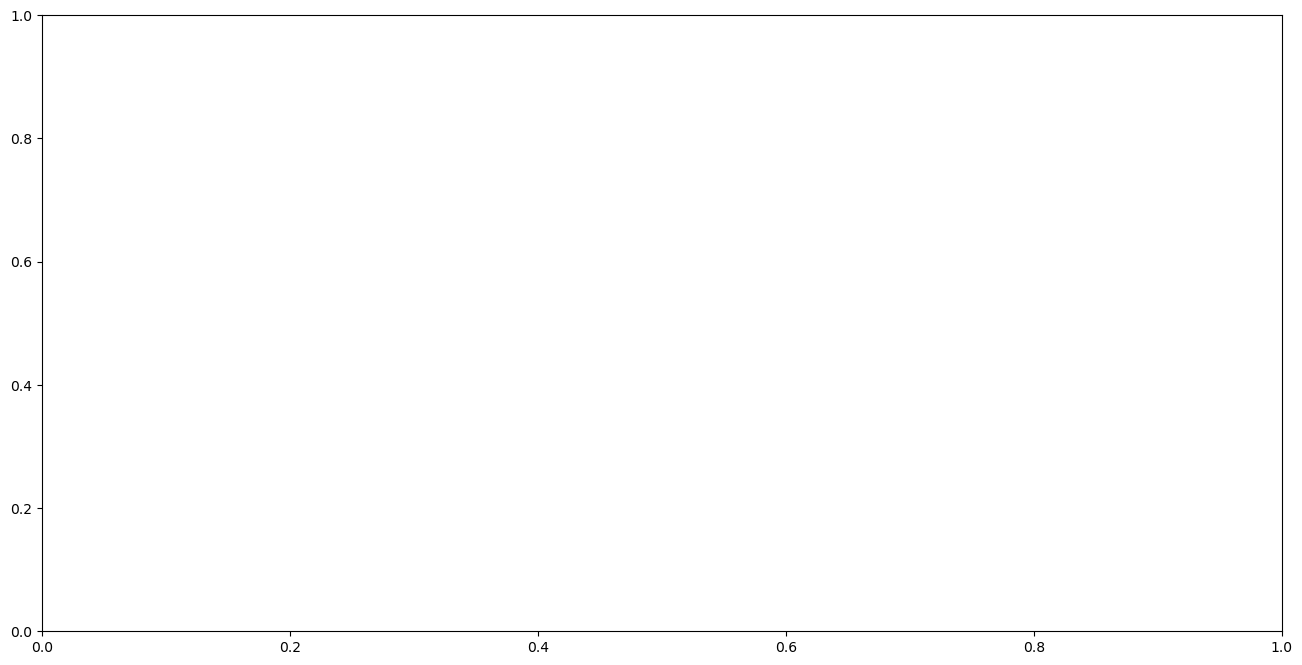

In [55]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x= unique_genre_names, y=genre_means, palette="magma")

plt.xticks(rotation=45)
plt.title("Average Profits per Genre", fontsize=30)
ax.set_xlabel("Genre", fontsize=15)
ax.set_ylabel("Average Profit ($ million)", fontsize=15);

Looking at our top 4 genres, we have several clear winners for "Average Profit"

Animation,
Sci-Fi,
Adventure,
Musical.

This is very useful information. However, a single movie in one specific genre could have been an enormous hit and could be potentially skewing these results. Let's visualize the medians per genre to see if this is the case.

NameError: name 'unique_genre_names' is not defined

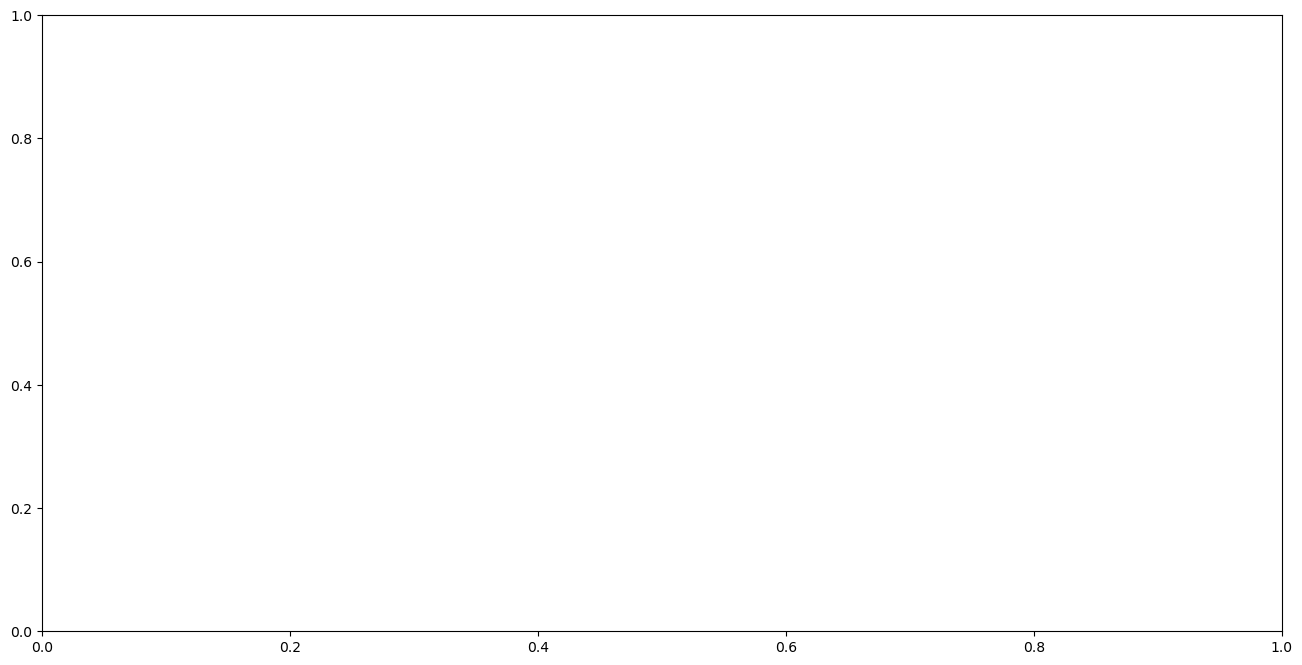

In [59]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.barplot(x= unique_genre_names, y=genre_medians, palette="magma")

plt.xticks(rotation=45)
plt.title("Median Profits per Genre", fontsize=30)
ax.set_xlabel("Genre", fontsize=15)
ax.set_ylabel("Median Profit ($ million)", fontsize=15);


As we can see, our top 4 for "Median Profit" has become

Animation,
Adventure,
Sci-Fi,
Action

We have essentially the same top 3, but what in the world happened to our "musical" category we were looking at just a moment ago? From the visualization, we can see that calculating the median of these movies revealed what we believed to be true; your "average" popularity musical film does not seem to do so well as far as profits are concerned. Some outliers in this category are skewing the mean heavily.

CONCLUSIONS

We have essentially the same top 3, but what in the world happened to our "musical" category we were looking at just a moment ago? From the visualization, we can see that calculating the median of these movies revealed what we believed to be true; your "average" popularity musical film does not seem to do so well as far as profits are concerned. Some outliers in this category are skewing the mean heavily.



From our analysis, our top 4 highest-rated genres are (in order):
Documentary,
Music,
History,
Animation

Unfortunately, there are some limitations to this. This conclusion was only determined based on a single dataset. To add more robustness to this conclusion, I would recommend that another ratings dataset be cleaned and visualized; the IMDB dataset would be excellent for this. Additionally, there was a minimum ratings filter set to 5 for this visualization. In doing so, this removed about half our datapoints. However, since we are an extremely large company (Microsoft) trying to get into the movies space, we are likely targeting larger scale movies. If our movies are recieving less than 5 ratings, we might be in trouble. So, perhaps the data we filtered out is not as relevant to us and there is no issue with our methodology here.

From our analysis, top 3 most profitable genres are clearly:
Animation,
Adventure,
Sci-Fi.

Future Improvements


Return on investment data would be extremely useful for investors. Unfortunately, my data has limitations- I only calculated if movies for a certain genre at least broke even (aka technically profitable). If a movie budget was 100 million dollars and we only made a profit of one dollar, it's TECHNICALLY still profitable, but that is probably not considered a successful box office killing. Return on investment would be more relevant for scenarios like this.

The dataset I used for ratings was somewhat limiting. Investigating another dataset such as the IMDB would provide another perspective to potentially confirm this data. Different types of users browse, use, and give different ratings on different sites. There's no telling what the differences in preference might be.